In [19]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

In [97]:
sys.path.append('/Users/giovanni/Documents/Atai/projects/tfc_pretrain/TFC-pretraining/code/TFC/')
sys.path.append('/Users/giovanni/Documents/Atai/projects/tfc_pretrain/TFC-pretraining/code/TFC/model')
sys.path.append('/Users/giovanni/Documents/Atai/projects/tfc_pretrain/TFC-pretraining/code/TFC/dataloader')
sys.path.append('/Users/giovanni/Documents/Atai/projects/tfc_pretrain/TFC-pretraining/code/config_files/')
sys.path.append('/Users/giovanni/Documents/Atai/projects/tfc_pretrain/TFC-pretraining/code/config_files/SleepEEG_Configs')
sys.path.append('/Users/giovanni/Documents/Atai/projects/tfc_pretrain/TFC-pretraining/code/config_files/HAR_Configs')


In [4]:
import torch
from model import TFC
from SleepEEG_Configs import Config as Configs
from dataloader import data_generator

In [5]:
torch.backends.mps.is_available()

True

In [32]:
SEED = 42
load_from = '../code/experiments_logs/SleepEEG_2_Epilepsy/run1/pre_train_seed_42_2layertransformer/saved_models/'
sourcedata_path = '../datasets/SleepEEG/'
targetdata_path = '../datasets/Epilepsy/'
training_mode = 'pre_train' #'fine_tune_test'
subset = False


device = torch.device("mps")
configs = Configs()

In [138]:
TFC_model = TFC(configs).to(device)

chkpoint = torch.load(os.path.join(load_from, "ckp_last.pt"), map_location=device)
pretrained_dict = chkpoint["model_state_dict"]
TFC_model.load_state_dict(pretrained_dict)

<All keys matched successfully>

In [51]:
train = torch.load('../datasets/SleepEEG/train.pt')
test = torch.load('../datasets/SleepEEG/test.pt')

In [63]:
train = torch.load('../datasets/MddEEG/train.pt')
test = torch.load('../datasets/MddEEG/test.pt')

In [158]:
train_har = torch.load('../datasets/HAR/train.pt')
# test = torch.load('../datasets/MddEEG/test.pt')

In [159]:
train_fog = torch.load('../datasets/FOG_pretrain/train.pt')

In [139]:
test.keys()

dict_keys(['samples', 'labels'])

In [140]:
train['samples'].numpy().shape

(6000, 3, 500)

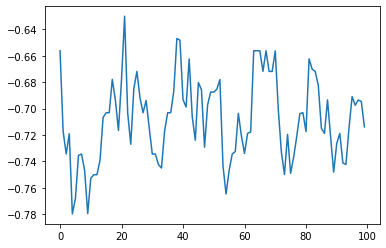

In [169]:
plt.plot(train_fog['samples'].numpy()[20,0,:100])

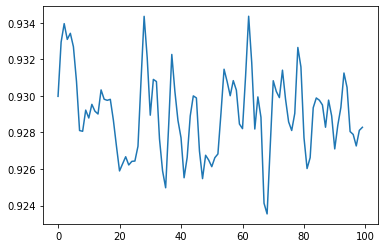

In [168]:
plt.plot(train_har['samples'].numpy()[50,0,:100])

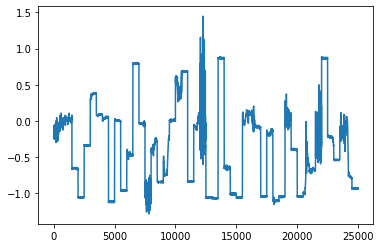

In [145]:
plt.plot(np.hstack(train['samples'].numpy()[:50,2,:]))

In [66]:
test['samples'].shape

torch.Size([9978, 1, 178])

In [67]:
np.unique(test['labels'])

array([0, 1])

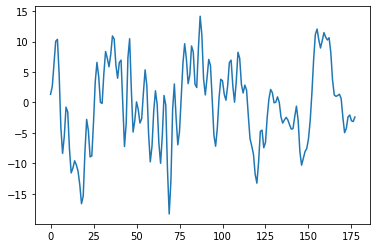

In [68]:
plt.plot(test['samples'][100, 0, :].numpy())

In [146]:
sourcedata_path = '../datasets/FOG_pretrain/'
targetdata_path = '../datasets/Gesture/'
training_mode = 'pre_train' #'fine_tune_test'
from HAR_Configs import Config as Configs
configs = Configs()

In [170]:
train_dl, valid_dl, test_dl = data_generator(sourcedata_path, targetdata_path, configs, training_mode, subset=subset)

In [171]:
data, labels, aug1, data_f, aug1_f = next(iter(train_dl))

In [172]:
data.numpy().shape

(128, 1, 206)

In [173]:
idx = 2

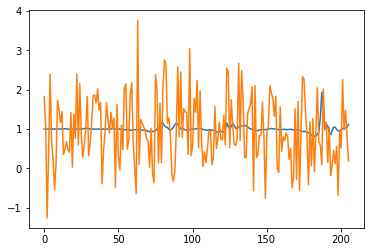

In [174]:
plt.plot(data[idx, 0, :].numpy())
plt.plot(aug1[idx, 0, :].numpy())

(0.0, 10.0)

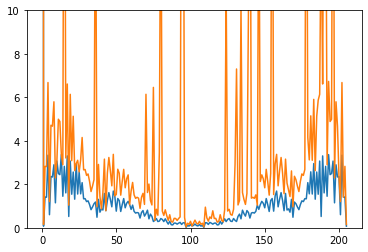

In [176]:
plt.plot(data_f[idx, 0, :].numpy())
plt.plot(aug1_f[idx, 0, :].numpy())

plt.ylim(0,10)

In [165]:
h_t, z_t, h_f, z_f = TFC_model(data.to(torch.float32).to(device), data_f.to(torch.float32).to(device))
fea_concat = torch.cat((z_t, z_f), dim=1)

In [166]:
fea_concat = fea_concat.to('cpu').detach().numpy()


In [168]:

from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(fea_concat)


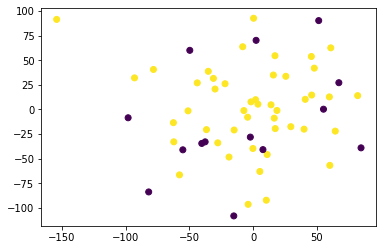

In [171]:
plt.scatter(X_embedded[:,1], X_embedded[:,2],c=list(labels.numpy()))